# Última aula - Aula 5

<p>Essa é a últim aula do Imersão Dados. Os desafios da aula serão:</p>

<ol>
    <li>Adicionar o valor "real" do m² do imóvel.</li>
    <li>Testar outro modelo de regressão.</li>
    <li>Criar um modelo baseline com as features originais.</li>
    <li>Trabalhar mais nos dados e criar novas variáveis.</li>
    <li>Testar as predições para casos reais.</li>
    <li>Criar um projeto com os resultados da Imersão e postar nas redes sociais mostrando o trabalho realizado. Lembre-se de marcar a @AluraOnline e utilizar as hashtags #ImersãoDados e #ImersãoDados4.</li>   
</ol>

In [15]:
#Importando bibliotecas importantes
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#sns.set(style = "white")
from colorsys import hls_to_rgb #Para cores!
from scipy import stats #Para tratamento os outliers que irão aparecer.
from shapely.geometry import Point   #Para uso da latitude e longitude.
from shapely.geometry import Polygon #Para uso da latitude e longitude.
import geopandas as gpd              #Para uso da latitude e longitude.
from sklearn.linear_model import LinearRegression

# -------------------- Método de IA
from sklearn.ensemble import RandomForestRegressor
#Do SKLEARN, usarei o método de Floresta Aleatória para treinar o modelo.
from sklearn.model_selection import cross_val_score
#Do SKLEARN, uso esse método para fazer validação cruzada (cross-validation) nos dados.
from xgboost import XGBRegressor
#Esse é um outro método de IA que é apresentado perto do fim do notebook.

In [16]:
#Pegando importações de outro notebook para estudo de IA:

# -------------------- Separação de dados e teste MEA
from sklearn.model_selection import train_test_split 
#Do SKLEARN, pego algo que faz o split dos dados automaticamente.
from sklearn.metrics import mean_absolute_error, r2_score
#Do SKLEARN, pego o método para obter os resíduos (erros) após o treinamento.

# -------------------- Método de IA
from sklearn.ensemble import RandomForestRegressor
#Do SKLEARN, usarei o método de Floresta Aleatória para treinar o modelo.
from sklearn.model_selection import cross_val_score
#Do SKLEARN, uso esse método para fazer validação cruzada (cross-validation) nos dados.
from xgboost import XGBRegressor
#Esse é um outro método de IA que é apresentado perto do fim do notebook.

# -------------------- Tratamento de dados
from sklearn.impute import SimpleImputer
#Do SKLEARN, importo um método para imputações, no caso o SimpleImputer.

# --------------------- Codificação
from sklearn.preprocessing import OrdinalEncoder
#Do SKLEARN, importo um método para codificação ordinária.
from sklearn.preprocessing import OneHotEncoder
#Do SKLEARN, importo o método para codificação OneHotEncoder

# -------------------- Pipeline de dados
from sklearn.compose import ColumnTransformer
#Do SKLEARN, importo um método para criar um pacote de processos, como imputação em dados numéricos
#e categóricos.
from sklearn.pipeline import Pipeline

In [3]:
def bairros_ruins(DATASET,AGRUPAMENTO="Bairro",CONTAGEM="Metragem",CASAS=3):
    """
    A sintaxe da função é: bairros_ruins(DATASET, AGRUPAMENTO, CONTAGEM, CASAS=3)
    Essa função irá criar um lista para salvar os bairros que tenham um número menor de casas do que 
    é especificado para a função e irá retornar essa lista. 
    O DATASET será responsável por carregar o dataframe que será analisado. 
    O BAIRRO será responsável pelo agrupamento dos bairros.
    A CONTAGEM será o termo utilizado para que a contagem do número de casas seja feita. 
    Por fim, CASAS é o número de "corte" para algo ser salvo na lista.
    """
    lista_retorno = []
    for i in DATASET.groupby([AGRUPAMENTO]).count()[CONTAGEM].index:
        val = DATASET.groupby([AGRUPAMENTO]).count()[CONTAGEM].loc[i]
        if val <=CASAS:
            lista_retorno.append(i)
    return lista_retorno

In [4]:
path_vendas = "dados_vendas_censo.csv"
dados_vendas_censo = pd.read_csv(path_vendas)

In [5]:
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7.000,7000.000000,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,3.700,7459.677419,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,0.380,3040.000000,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,0.540,5400.000000,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.0,1.980,4500.000000,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.0,0.960,6114.649682,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0,1.500,5617.977528,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.0,0.665,7000.000000,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.0,1.050,5121.951220,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [29]:
list(dados_vendas_censo)

['Rua',
 'Bairro',
 'Cidade',
 'Metragem',
 'Quartos',
 'Banheiros',
 'Vagas',
 'Valor_anuncio',
 'Valor_mm',
 'Valor_m2',
 'latitude',
 'longitude',
 'Situacao_setor',
 'V001',
 'V002',
 'V003',
 'V004',
 'V005',
 'V006',
 'V007',
 'V008',
 'V009',
 'V010',
 'V011',
 'V012']

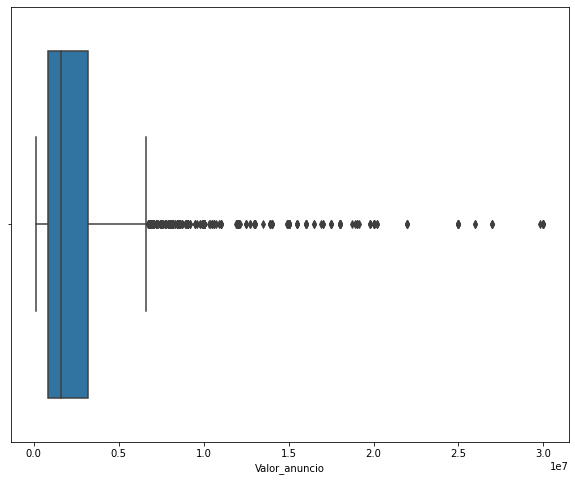

In [10]:
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, x="Valor_anuncio")
plt.show()

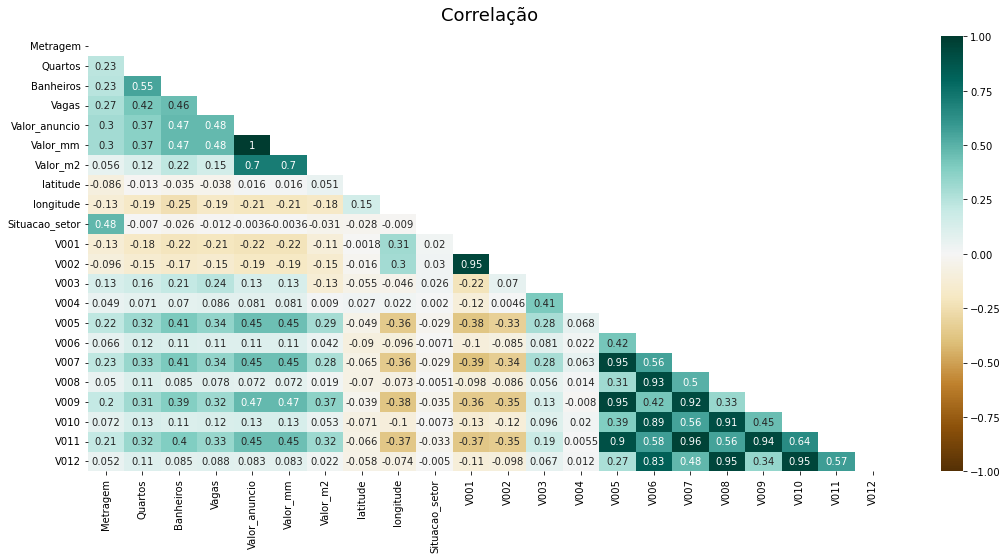

In [7]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

In [8]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V007', 'V009']]
Y = dados_vendas_censo["Valor_anuncio"]
lr = LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

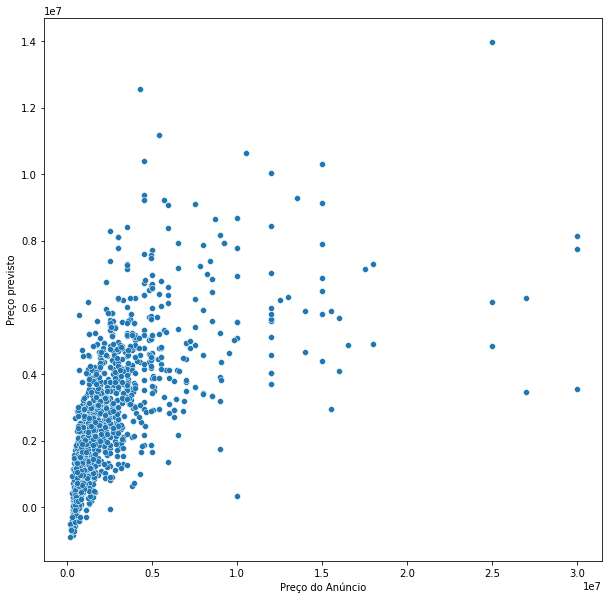

In [9]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=Y_test, y=Y_predict_test)
plt.xlabel("Preço do Anúncio")
plt.ylabel("Preço previsto")
plt.show()

### Desafio 1:

<p>Tentar encontrar dados de bairros de SP e utilizar esses dados para obter o metro quadrado desse bairro, ao invés da base de dados utilizada.</p>

### Desafio 2:

<p>Testar outros modelos de regressão.</p>

##### Modelo 1:

<p>Para esse modelo irei utilizar as variáveis - "Quartos", "Banheiros", "Vagas", "V009". O treinamento do modelo irá utilizar o método de Floresta Aleatória (Random Florest).</p>

In [45]:
#Separo o dataset em variáveis de interesse e modelo utilizado.
X_modelo1 = dados_vendas_censo[["Quartos", "Banheiros", "Vagas","V009"]]
Y_modelo1 = dados_vendas_censo["Valor_anuncio"]

#Defino uma função que irá me dar o modelo. Aqui essa função me permite estudar diferentes random_states e n_estimators de forma
#extremamente rápida.

def RandomForest_Modelo(X_TREINO,X_TESTE,Y_TREINO,Y_TESTE,N_EST=100,RAND_ST=0):
    Modelo = RandomForestRegressor(n_estimators=N_EST,random_state=RAND_ST)
    Modelo.fit(X_TREINO,Y_TREINO)
    Pred_mod = Modelo.predict(X_TESTE)
    print("Esse modelo apresenta um n_estimators=%s e um random_state=%s"%(N_EST,RAND_ST))
    print("O MAE desse modelo é R$%s;"%(mean_absolute_error(Y_TESTE,Pred_mod)))
    print("O r2_score desse modelo é %s."%(r2_score(Y_TESTE,Pred_mod)))
    print("")
    return Pred_mod

#Separo os resultados e treino o modelo:
X_m1_treino, X_m1_teste, Y_m1_treino, Y_m1_teste = train_test_split(X_modelo1, Y_modelo1, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mU = RandomForest_Modelo(X_TREINO=X_m1_treino, X_TESTE=X_m1_teste, Y_TREINO=Y_m1_treino, Y_TESTE=Y_m1_teste)

#Outro modelo envolvendo um random_state diferente:
X_m1_treino, X_m1_teste, Y_m1_treino, Y_m1_teste = train_test_split(X_modelo1, Y_modelo1, 
                                                                    test_size = 0.25, random_state = 10)
Pred_mU = RandomForest_Modelo(X_TREINO=X_m1_treino, X_TESTE=X_m1_teste, Y_TREINO=Y_m1_treino, Y_TESTE=Y_m1_teste, 
                    RAND_ST=10)

#Outro modelo envolvendo um n_estimators diferente:
X_m1_treino, X_m1_teste, Y_m1_treino, Y_m1_teste = train_test_split(X_modelo1, Y_modelo1, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mU = RandomForest_Modelo(X_TREINO=X_m1_treino, X_TESTE=X_m1_teste, Y_TREINO=Y_m1_treino, Y_TESTE=Y_m1_teste, 
                    N_EST=200)

#Outro modelo envolvendo um n_estimators diferente e um random_state também diferente:
X_m1_treino, X_m1_teste, Y_m1_treino, Y_m1_teste = train_test_split(X_modelo1, Y_modelo1, 
                                                                    test_size = 0.25, random_state = 10)
Pred_mU = RandomForest_Modelo(X_TREINO=X_m1_treino, X_TESTE=X_m1_teste, Y_TREINO=Y_m1_treino, Y_TESTE=Y_m1_teste, 
                    N_EST=200, RAND_ST=10)

#Outro modelo envolvendo um n_estimators diferente e um random_state também diferente:
X_m1_treino, X_m1_teste, Y_m1_treino, Y_m1_teste = train_test_split(X_modelo1, Y_modelo1, 
                                                                    test_size = 0.25, random_state = 50)
Pred_mU = RandomForest_Modelo(X_TREINO=X_m1_treino, X_TESTE=X_m1_teste, Y_TREINO=Y_m1_treino, Y_TESTE=Y_m1_teste, 
                    N_EST=200, RAND_ST=50)

Esse modelo apresenta um n_estimators=100 e um random_state=0
O MAE desse modelo é R$948630.1213789339;
O r2_score desse modelo é 0.6206425725459169.

Esse modelo apresenta um n_estimators=100 e um random_state=10
O MAE desse modelo é R$965703.5838722136;
O r2_score desse modelo é 0.5998497776010356.

Esse modelo apresenta um n_estimators=200 e um random_state=0
O MAE desse modelo é R$936430.040966953;
O r2_score desse modelo é 0.6257859384535681.

Esse modelo apresenta um n_estimators=200 e um random_state=10
O MAE desse modelo é R$963551.356387714;
O r2_score desse modelo é 0.6050502386112844.

Esse modelo apresenta um n_estimators=200 e um random_state=50
O MAE desse modelo é R$942455.5336085251;
O r2_score desse modelo é 0.6327806574404194.



##### Modelo 2:

<p>Para esse modelo irei utilizar as variáveis - "Quartos", "Banheiros", "Vagas", "latitude", "longitude", "V009". O treinamento do modelo irá utilizar o método de Floresta Aleatória (Random Florest).</p>

In [46]:
#Separo o dataset em variáveis de interesse e modelo utilizado.
X_modelo2 = dados_vendas_censo[["Quartos", "Banheiros", "Vagas","latitude","longitude","V009"]]
Y_modelo2 = dados_vendas_censo["Valor_anuncio"]

#Como estou usando a mesma função de antes, não irei criar uma nova função.

#Separo os resultados e treino o modelo:
X_m2_treino, X_m2_teste, Y_m2_treino, Y_m2_teste = train_test_split(X_modelo2, Y_modelo2, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mD =RandomForest_Modelo(X_TREINO=X_m2_treino, X_TESTE=X_m2_teste, Y_TREINO=Y_m2_treino, Y_TESTE=Y_m2_teste)

#Outro modelo envolvendo um random_state diferente:
X_m2_treino, X_m2_teste, Y_m2_treino, Y_m2_teste = train_test_split(X_modelo2, Y_modelo2, 
                                                                    test_size = 0.25, random_state = 10)
Pred_mD =RandomForest_Modelo(X_TREINO=X_m2_treino, X_TESTE=X_m2_teste, Y_TREINO=Y_m2_treino, Y_TESTE=Y_m2_teste, 
                    RAND_ST=10)

#Outro modelo envolvendo um n_estimators diferente:
X_m2_treino, X_m2_teste, Y_m2_treino, Y_m2_teste = train_test_split(X_modelo2, Y_modelo2, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mD =RandomForest_Modelo(X_TREINO=X_m2_treino, X_TESTE=X_m2_teste, Y_TREINO=Y_m2_treino, Y_TESTE=Y_m2_teste, 
                    N_EST=200)

#Outro modelo envolvendo um n_estimators diferente e um random_state também diferente:
X_m2_treino, X_m2_teste, Y_m2_treino, Y_m2_teste = train_test_split(X_modelo2, Y_modelo2, 
                                                                    test_size = 0.25, random_state = 10)
Pred_mD = RandomForest_Modelo(X_TREINO=X_m2_treino, X_TESTE=X_m2_teste, Y_TREINO=Y_m2_treino, Y_TESTE=Y_m2_teste, 
                    N_EST=200, RAND_ST=10)

#Outro modelo envolvendo um n_estimators diferente e um random_state também diferente:
X_m2_treino, X_m2_teste, Y_m2_treino, Y_m2_teste = train_test_split(X_modelo2, Y_modelo2, 
                                                                    test_size = 0.25, random_state = 50)
Pred_mD = RandomForest_Modelo(X_TREINO=X_m2_treino, X_TESTE=X_m2_teste, Y_TREINO=Y_m2_treino, Y_TESTE=Y_m2_teste, 
                    N_EST=200, RAND_ST=50)

Esse modelo apresenta um n_estimators=100 e um random_state=0
O MAE desse modelo é R$814104.5956303523;
O r2_score desse modelo é 0.7072257016885208.

Esse modelo apresenta um n_estimators=100 e um random_state=10
O MAE desse modelo é R$820808.0940769889;
O r2_score desse modelo é 0.7133281650952564.

Esse modelo apresenta um n_estimators=200 e um random_state=0
O MAE desse modelo é R$807925.740696753;
O r2_score desse modelo é 0.7104613651296939.

Esse modelo apresenta um n_estimators=200 e um random_state=10
O MAE desse modelo é R$811145.1853529896;
O r2_score desse modelo é 0.720521340886227.

Esse modelo apresenta um n_estimators=200 e um random_state=50
O MAE desse modelo é R$802074.7629198778;
O r2_score desse modelo é 0.7194314359085994.



##### Modelo 3:

<p>Para esse modelo irei utilizar as variáveis - "Metragem", "Quartos", "Situacao_setor", "V009". O treinamento do modelo irá utilizar o método de Floresta Aleatória (Random Florest).</p>

In [48]:
#Separo o dataset em variáveis de interesse e modelo utilizado.
X_modelo3 = dados_vendas_censo[["Metragem", "Quartos", "Situacao_setor", "V009"]]
Y_modelo3 = dados_vendas_censo["Valor_anuncio"]

#Como estou usando a mesma função de antes, não irei criar uma nova função.

#Separo os resultados e treino o modelo:
X_m3_treino, X_m3_teste, Y_m3_treino, Y_m3_teste = train_test_split(X_modelo3, Y_modelo3, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mT = RandomForest_Modelo(X_TREINO=X_m3_treino, X_TESTE=X_m3_teste, Y_TREINO=Y_m3_treino, Y_TESTE=Y_m3_teste)

#Outro modelo envolvendo um random_state diferente:
X_m3_treino, X_m3_teste, Y_m3_treino, Y_m3_teste = train_test_split(X_modelo3, Y_modelo3, 
                                                                    test_size = 0.25, random_state = 10)
Pred_mT = RandomForest_Modelo(X_TREINO=X_m3_treino, X_TESTE=X_m3_teste, Y_TREINO=Y_m3_treino, Y_TESTE=Y_m3_teste, 
                    RAND_ST=10)

#Outro modelo envolvendo um n_estimators diferente:
X_m3_treino, X_m3_teste, Y_m3_treino, Y_m3_teste = train_test_split(X_modelo3, Y_modelo3, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mT = RandomForest_Modelo(X_TREINO=X_m3_treino, X_TESTE=X_m3_teste, Y_TREINO=Y_m3_treino, Y_TESTE=Y_m3_teste, 
                    N_EST=200)

#Outro modelo envolvendo um n_estimators diferente e um random_state também diferente:
X_m3_treino, X_m3_teste, Y_m3_treino, Y_m3_teste = train_test_split(X_modelo3, Y_modelo3, 
                                                                    test_size = 0.25, random_state = 10)
Pred_mT = RandomForest_Modelo(X_TREINO=X_m3_treino, X_TESTE=X_m3_teste, Y_TREINO=Y_m3_treino, Y_TESTE=Y_m3_teste, 
                    N_EST=200, RAND_ST=10)

#Outro modelo envolvendo um n_estimators diferente e um random_state também diferente:
X_m3_treino, X_m3_teste, Y_m3_treino, Y_m3_teste = train_test_split(X_modelo3, Y_modelo3, 
                                                                    test_size = 0.25, random_state = 50)
Pred_mT = RandomForest_Modelo(X_TREINO=X_m3_treino, X_TESTE=X_m3_teste, Y_TREINO=Y_m3_treino, Y_TESTE=Y_m3_teste, 
                    N_EST=200, RAND_ST=50)

Esse modelo apresenta um n_estimators=100 e um random_state=0
O MAE desse modelo é R$849448.2632936747;
O r2_score desse modelo é 0.70329342956883.

Esse modelo apresenta um n_estimators=100 e um random_state=10
O MAE desse modelo é R$819783.9978270296;
O r2_score desse modelo é 0.7176742735754533.

Esse modelo apresenta um n_estimators=200 e um random_state=0
O MAE desse modelo é R$846695.2976500294;
O r2_score desse modelo é 0.7025809430937131.

Esse modelo apresenta um n_estimators=200 e um random_state=10
O MAE desse modelo é R$815011.5836748962;
O r2_score desse modelo é 0.7177245791417837.

Esse modelo apresenta um n_estimators=200 e um random_state=50
O MAE desse modelo é R$778414.9939437191;
O r2_score desse modelo é 0.7371310940952398.



##### Modelo 4:

<p>Para esse modelo irei utilizar as variáveis - "Metragem", "Quartos", "Situacao_setor", "V009". O treinamento do modelo irá utilizar o método XGBoost.</p>

In [56]:
#Separo o dataset em variáveis de interesse e modelo utilizado.
X_modelo4 = dados_vendas_censo[["Metragem", "Quartos", "Situacao_setor", "V009"]]
Y_modelo4 = dados_vendas_censo["Valor_anuncio"]

#Defino uma função que irá me dar o modelo. Aqui essa função me permite estudar diferentes random_states e n_estimators de forma
#extremamente rápida.

def XGBoost_Modelo(X_TREINO,X_TESTE,Y_TREINO,Y_TESTE,N_EST=100,RAND_ST=0,LEARATE=0.1):
    Modelo = XGBRegressor(n_estimators=N_EST,random_state=RAND_ST,learning_rate=LEARATE)
    Modelo.fit(X_TREINO,Y_TREINO)
    Pred_mod = Modelo.predict(X_TESTE)
    print("Esse modelo apresenta um n_estimators=%s e um random_state=%s e um learning rate de %s"%(N_EST,RAND_ST,LEARATE))
    print("O MAE desse modelo é R$%s;"%(mean_absolute_error(Y_TESTE,Pred_mod)))
    print("O r2_score desse modelo é %s."%(r2_score(Y_TESTE,Pred_mod)))
    print("")
    return Pred_mod

#Separo os resultados e treino o modelo;
X_m4_treino, X_m4_teste, Y_m4_treino, Y_m4_teste = train_test_split(X_modelo4, Y_modelo4, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mQ = XGBoost_Modelo(X_TREINO=X_m4_treino, X_TESTE=X_m4_teste, Y_TREINO=Y_m4_treino, Y_TESTE=Y_m4_teste)

#Altero valores do learning rate;
X_m4_treino, X_m4_teste, Y_m4_treino, Y_m4_teste = train_test_split(X_modelo4, Y_modelo4, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mQ = XGBoost_Modelo(X_TREINO=X_m4_treino, X_TESTE=X_m4_teste, Y_TREINO=Y_m4_treino, Y_TESTE=Y_m4_teste, 
                         LEARATE=0.05)

#Altero valores para o Random_State e para o learning rate;
X_m4_treino, X_m4_teste, Y_m4_treino, Y_m4_teste = train_test_split(X_modelo4, Y_modelo4, 
                                                                    test_size = 0.25, random_state = 10)
Pred_mQ = XGBoost_Modelo(X_TREINO=X_m4_treino, X_TESTE=X_m4_teste, Y_TREINO=Y_m4_treino, Y_TESTE=Y_m4_teste, 
                         RAND_ST=10, LEARATE=0.05)

#Altero valores para o N_estimators e para o learning rate;
X_m4_treino, X_m4_teste, Y_m4_treino, Y_m4_teste = train_test_split(X_modelo4, Y_modelo4, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mQ = XGBoost_Modelo(X_TREINO=X_m4_treino, X_TESTE=X_m4_teste, Y_TREINO=Y_m4_treino, Y_TESTE=Y_m4_teste, 
                         N_EST=200, LEARATE=0.05)

#Altero valores para o Random_State, para o N_estimators e para o learning rate;
X_m4_treino, X_m4_teste, Y_m4_treino, Y_m4_teste = train_test_split(X_modelo4, Y_modelo4, 
                                                                    test_size = 0.25, random_state = 50)
Pred_mQ = XGBoost_Modelo(X_TREINO=X_m4_treino, X_TESTE=X_m4_teste, Y_TREINO=Y_m4_treino, Y_TESTE=Y_m4_teste,
                        RAND_ST=50, N_EST=200, LEARATE=0.05)
#Altero valores para o Random_State, para o N_estimators e para o learning rate;
X_m4_treino, X_m4_teste, Y_m4_treino, Y_m4_teste = train_test_split(X_modelo4, Y_modelo4, 
                                                                    test_size = 0.25, random_state = 25)
Pred_mQ = XGBoost_Modelo(X_TREINO=X_m4_treino, X_TESTE=X_m4_teste, Y_TREINO=Y_m4_treino, Y_TESTE=Y_m4_teste,
                        RAND_ST=25, N_EST=500, LEARATE=0.2)

#Altero valores para o Random_State, para o N_estimators e para o learning rate;
X_m4_treino, X_m4_teste, Y_m4_treino, Y_m4_teste = train_test_split(X_modelo4, Y_modelo4, 
                                                                    test_size = 0.25, random_state = 50)
Pred_mQ = XGBoost_Modelo(X_TREINO=X_m4_treino, X_TESTE=X_m4_teste, Y_TREINO=Y_m4_treino, Y_TESTE=Y_m4_teste,
                        RAND_ST=50, N_EST=500, LEARATE=0.1)

C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=100 e um random_state=0 e um learning rate de 0.1
O MAE desse modelo é R$893650.679581448;
O r2_score desse modelo é 0.6898929820855861.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=100 e um random_state=0 e um learning rate de 0.05
O MAE desse modelo é R$949089.8910020739;
O r2_score desse modelo é 0.6697223971833495.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=100 e um random_state=10 e um learning rate de 0.05
O MAE desse modelo é R$870314.5737179487;
O r2_score desse modelo é 0.7183038913845708.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=200 e um random_state=0 e um learning rate de 0.05
O MAE desse modelo é R$898973.6686463046;
O r2_score desse modelo é 0.6864877985550242.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=200 e um random_state=50 e um learning rate de 0.05
O MAE desse modelo é R$787202.6837999623;
O r2_score desse modelo é 0.779973700996839.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=500 e um random_state=25 e um learning rate de 0.2
O MAE desse modelo é R$673432.4889175622;
O r2_score desse modelo é 0.7752051017050796.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=500 e um random_state=50 e um learning rate de 0.1
O MAE desse modelo é R$671148.1716275453;
O r2_score desse modelo é 0.815181611041103.



##### Modelo 5:

<p>Para esse modelo irei utilizar as variáveis - "Metragem", "Quartos", "Banheiros", "Vagas", "latitude", "longitude", "V009". O treinamento do modelo irá utilizar o método XGBoost.</p>

In [61]:
#Separo o dataset em variáveis de interesse e modelo utilizado.
X_modelo5 = dados_vendas_censo[["Metragem", "Quartos", "Banheiros", "Vagas","latitude", "longitude", "V009"]]
Y_modelo5 = dados_vendas_censo["Valor_anuncio"]

#Defino uma função que irá me dar o modelo. Aqui essa função me permite estudar diferentes random_states e n_estimators de forma
#extremamente rápida.

def XGBoost_Modelo(X_TREINO,X_TESTE,Y_TREINO,Y_TESTE,N_EST=100,RAND_ST=0,LEARATE=0.1):
    Modelo = XGBRegressor(n_estimators=N_EST,random_state=RAND_ST,learning_rate=LEARATE)
    Modelo.fit(X_TREINO,Y_TREINO)
    Pred_mod = Modelo.predict(X_TESTE)
    print("Esse modelo apresenta um n_estimators=%s e um random_state=%s e um learning rate de %s"%(N_EST,RAND_ST,LEARATE))
    print("O MAE desse modelo é R$%s;"%(mean_absolute_error(Y_TESTE,Pred_mod)))
    print("O r2_score desse modelo é %s."%(r2_score(Y_TESTE,Pred_mod)))
    print("")
    return Pred_mod

#Separo os resultados e treino o modelo;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste)

#Altero valores do learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                         LEARATE=0.05)

#Altero valores para o Random_State e para o learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 10)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                         RAND_ST=10, LEARATE=0.05)

#Altero valores para o N_estimators e para o learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                         N_EST=200, LEARATE=0.05)

#Altero valores para o Random_State, para o N_estimators e para o learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 50)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                        RAND_ST=50, N_EST=200, LEARATE=0.05)
#Altero valores para o Random_State, para o N_estimators e para o learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 25)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                        RAND_ST=25, N_EST=500, LEARATE=0.2)

#Altero valores para o Random_State, para o N_estimators e para o learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 50)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                        RAND_ST=50, N_EST=500, LEARATE=0.1)

C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=100 e um random_state=0 e um learning rate de 0.1
O MAE desse modelo é R$693799.4950509049;
O r2_score desse modelo é 0.8264482073863404.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=100 e um random_state=0 e um learning rate de 0.05
O MAE desse modelo é R$738773.9220164027;
O r2_score desse modelo é 0.8113254955776497.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=100 e um random_state=10 e um learning rate de 0.05
O MAE desse modelo é R$705581.6704845399;
O r2_score desse modelo é 0.8251439701923802.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=200 e um random_state=0 e um learning rate de 0.05
O MAE desse modelo é R$686800.2159219458;
O r2_score desse modelo é 0.8299903926806647.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=200 e um random_state=50 e um learning rate de 0.05
O MAE desse modelo é R$639492.4807456636;
O r2_score desse modelo é 0.8611189924760062.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=500 e um random_state=25 e um learning rate de 0.2
O MAE desse modelo é R$533409.9055194193;
O r2_score desse modelo é 0.8497317556076865.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=500 e um random_state=50 e um learning rate de 0.1
O MAE desse modelo é R$537080.9224170437;
O r2_score desse modelo é 0.8803083721376161.



<p>Devido aos resultados do quinto modelo utilizando o método XGBoost com os parâmetros n_estimators=500, random_state=50 e learning_rate=0.1 tenho a impressão de que ele é o melhor. Entretanto, devemos proceder com cautela pois os dados utilizados são apenas do dataset de treino e o modelo pode estar sofrendo de <b>overfitting</b>. Até testarmos o modelo com dados reais não posso afirmar que esse é o melhor de todos os modelos.</p>

### Desafio 3:

<p>Criar um modelo "baseline" com as variáveis originais.</p>

<p>Para esse modelo "baseline" irei utilizar do XGBoost devido a ele ter apresentado os melhores resultados. As variáveis originais do modelo são apenas: "Metragem", "Quartos", "Banheiros", "Vagas".</p>

In [59]:
#Separo o dataset em variáveis de interesse e modelo utilizado.
X_modelo5 = dados_vendas_censo[["Metragem", "Quartos", "Banheiros", "Vagas"]]
Y_modelo5 = dados_vendas_censo["Valor_anuncio"]

#Defino uma função que irá me dar o modelo. Aqui essa função me permite estudar diferentes random_states e n_estimators de forma
#extremamente rápida.

def XGBoost_Modelo(X_TREINO,X_TESTE,Y_TREINO,Y_TESTE,N_EST=100,RAND_ST=0,LEARATE=0.1):
    Modelo = XGBRegressor(n_estimators=N_EST,random_state=RAND_ST,learning_rate=LEARATE)
    Modelo.fit(X_TREINO,Y_TREINO)
    Pred_mod = Modelo.predict(X_TESTE)
    print("Esse modelo apresenta um n_estimators=%s e um random_state=%s e um learning rate de %s"%(N_EST,RAND_ST,LEARATE))
    print("O MAE desse modelo é R$%s;"%(mean_absolute_error(Y_TESTE,Pred_mod)))
    print("O r2_score desse modelo é %s."%(r2_score(Y_TESTE,Pred_mod)))
    print("")
    return Pred_mod

#Separo os resultados e treino o modelo;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste)

#Altero valores do learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                         LEARATE=0.05)

#Altero valores para o Random_State e para o learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 10)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                         RAND_ST=10, LEARATE=0.05)

#Altero valores para o N_estimators e para o learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 0)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                         N_EST=200, LEARATE=0.05)

#Altero valores para o Random_State, para o N_estimators e para o learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 50)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                        RAND_ST=50, N_EST=200, LEARATE=0.05)
#Altero valores para o Random_State, para o N_estimators e para o learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 25)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                        RAND_ST=25, N_EST=500, LEARATE=0.2)

#Altero valores para o Random_State, para o N_estimators e para o learning rate;
X_m5_treino, X_m5_teste, Y_m5_treino, Y_m5_teste = train_test_split(X_modelo5, Y_modelo5, 
                                                                    test_size = 0.25, random_state = 50)
Pred_mC = XGBoost_Modelo(X_TREINO=X_m5_treino, X_TESTE=X_m5_teste, Y_TREINO=Y_m5_treino, Y_TESTE=Y_m5_teste,
                        RAND_ST=50, N_EST=500, LEARATE=0.1)

C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=100 e um random_state=0 e um learning rate de 0.1
O MAE desse modelo é R$1182702.3178261688;
O r2_score desse modelo é 0.5454482077858942.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=100 e um random_state=0 e um learning rate de 0.05
O MAE desse modelo é R$1172382.6951121795;
O r2_score desse modelo é 0.5540347319619464.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=100 e um random_state=10 e um learning rate de 0.05
O MAE desse modelo é R$1116094.445630656;
O r2_score desse modelo é 0.5853311043329132.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=200 e um random_state=0 e um learning rate de 0.05
O MAE desse modelo é R$1170996.2565987934;
O r2_score desse modelo é 0.5468508469803381.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=200 e um random_state=50 e um learning rate de 0.05
O MAE desse modelo é R$1119450.0884238312;
O r2_score desse modelo é 0.6100587868617828.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=500 e um random_state=25 e um learning rate de 0.2
O MAE desse modelo é R$1195479.943866068;
O r2_score desse modelo é 0.4198170338874907.



C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Esse modelo apresenta um n_estimators=500 e um random_state=50 e um learning rate de 0.1
O MAE desse modelo é R$1132772.9808517157;
O r2_score desse modelo é 0.5734269393041298.



<p>Podemos observar que esse modelo não apresenta bons resultados mesmo que o método de IA seja o melhor dos modelos treinados antes, tendo um r2_score entre 0.4 e 0.6.</p>

### Desafio 4:

<p>Trabalhar mais nos dados e criar novas variáveis.</p>

### Desafio 5:

<p>Testar o modelo para casos reais.</p>